In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_functions.mentimeter import Mentimeter

# Import files

In [5]:
summary = pd.read_csv('data_sources/NMR_summary.csv', sep=';')
summary.set_index('Molecule_ID', inplace=True)
summary.head()

heteroatom_count
Molecule_ID                  
1                           0
2                           2
3                           1
4                           1
5                           2

In [12]:
test_NMR = pd.read_csv('data_sources/NMR_data/1.txt', sep='\t', header=None, columns=['shift',])
test_NMR.head()

0         1         2
0  13.796019 -0.050616  0.263138
1  13.795790 -0.057511  0.248825
2  13.795560 -0.047204  0.235817
3  13.795331 -0.030370  0.238590
4  13.795102 -0.023873  0.254259

(53000.0, 55000.0)

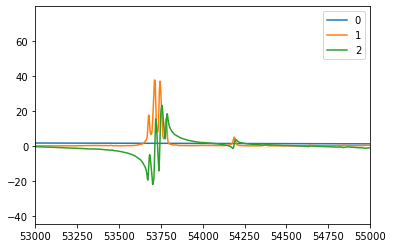

In [16]:
ax = test_NMR.plot()
ax.set_xlim(53000, 55000)

In [20]:
all_NMR_data = {}

for ID in summary.index:
    file_name = 'data_sources/NMR_data/' + str(ID) + '.txt'
    all_NMR_data[ID] = pd.read_csv(file_name, sep='\t', header=None, names=['shift','intensity','deriv'])

In [21]:
all_NMR_data

{1:            shift  intensity     deriv
 0      13.796019  -0.050616  0.263138
 1      13.795790  -0.057511  0.248825
 2      13.795560  -0.047204  0.235817
 3      13.795331  -0.030370  0.238590
 4      13.795102  -0.023873  0.254259
 ...          ...        ...       ...
 65531  -1.232515  -0.089755  0.245093
 65532  -1.232745  -0.081560  0.231704
 65533  -1.232974  -0.065548  0.230505
 65534  -1.233203  -0.056320  0.243439
 65535  -1.233433  -0.063540  0.257163
 
 [65536 rows x 3 columns],
 2:            shift  intensity     deriv
 0      13.956788  -0.053738  0.022381
 1      13.956559  -0.032288  0.040965
 2      13.956329  -0.036495  0.065876
 3      13.956100  -0.055308  0.073475
 4      13.955871  -0.066602  0.064660
 ...          ...        ...       ...
 65531  -1.071746  -0.062529  0.067477
 65532  -1.071976  -0.057715  0.067275
 65533  -1.072205  -0.065142  0.073644
 65534  -1.072434  -0.080833  0.063418
 65535  -1.072664  -0.078044  0.038105
 
 [65536 rows x 3 columns],


# Check statistics

In [24]:
all_NMR_data[1]
chem_shift_min = all_NMR_data[1]['shift'].min()
chem_shift_max = all_NMR_data[1]['shift'].max()
shift_range = chem_shift_max - chem_shift_min
print(shift_range)

15.029452


In [25]:
all_NMR_data[1]['intensity'].max()

74.038383

In [32]:
baseline = all_NMR_data[1].nsmallest(n = int(0.4*all_NMR_data[1].shape[0]), columns=['intensity'])['intensity'].std()

In [35]:
def summary_stats(NMR_dataframe):
    """ Return summary statistics for an NMR dataframe. """
    
    chem_shift_min = NMR_dataframe['shift'].min()
    chem_shift_max = NMR_dataframe['shift'].max()
    shift_range = chem_shift_max - chem_shift_min

    max_intensity = NMR_dataframe['intensity'].max()

    baseline = NMR_dataframe.nsmallest(n = int(0.4*NMR_dataframe.shape[0]), columns=['intensity'])['intensity'].std()
    
    return shift_range, max_intensity, baseline

In [36]:
summary_stats(all_NMR_data[1])

(15.029452, 74.038383, 0.014460041670381759)

In [41]:
for ID in all_NMR_data:
    stats = summary_stats(all_NMR_data[ID])
    
    summary.loc[ID, ['shift_range', 'max_intensity','baseline_std']] = stats

In [42]:
summary.describe()

heteroatom_count  shift_range  max_intensity  baseline_std
count         58.000000    58.000000           58.0     58.000000
mean           2.086207    15.126457            1.0      0.000199
std            1.013669     0.738770            0.0      0.000264
min            0.000000    15.029451            1.0      0.000015
25%            1.250000    15.029451            1.0      0.000048
50%            2.000000    15.029452            1.0      0.000095
75%            3.000000    15.029452            1.0      0.000246
max            6.000000    20.655757            1.0      0.001555

In [40]:
# MAKE SURE YOU NORMALISE YOUR DATA!!!
for ID in all_NMR_data:
    all_NMR_data[ID]['intensity'] = all_NMR_data[ID]['intensity'] / all_NMR_data[ID]['intensity'].max()

# Find peaks

In [43]:
from scipy.signal import find_peaks

Text(0, 0.5, 'Normalised intensity')

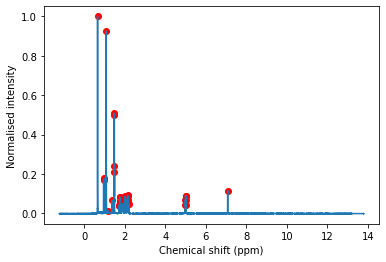

In [49]:
peaks, peak_info = find_peaks(all_NMR_data[1]['intensity'],
                              prominence = 0.01,
                             )


fig = plt.figure()
ax = fig.add_subplot()

ax.plot(all_NMR_data[1]['shift'], all_NMR_data[1]['intensity'])
ax.scatter(all_NMR_data[1]['shift'][peaks],
           all_NMR_data[1]['intensity'][peaks],
           color='r'
          )

ax.set_xlabel('Chemical shift (ppm)')
ax.set_ylabel('Normalised intensity')